In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

data = pd.read_csv("TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-28,459.023987,463.697998,437.303986,442.679993,442.679993,100406000
1,2020-08-31,444.609985,500.140015,440.109985,498.320007,498.320007,118374400
2,2020-09-01,502.140015,502.489990,470.510010,475.049988,475.049988,89841100
3,2020-09-02,478.989990,479.040009,405.119995,447.369995,447.369995,96176100
4,2020-09-03,407.230011,431.799988,402.000000,407.000000,407.000000,87596100


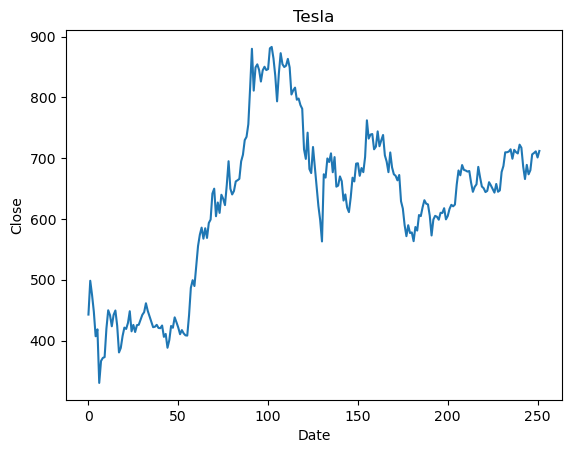

In [2]:
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [3]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]

In [4]:
data = data.rename(columns={"Date":"ds", "Close":"y"})

In [5]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
612,2022-08-23,991.541211,0.524036,1979.739177
613,2022-08-24,990.087806,5.352740,1978.746199
614,2022-08-25,990.032353,-11.811819,1993.093898
615,2022-08-26,993.375562,-2.728759,2009.817012
616,2022-08-27,1017.412166,14.817080,2022.776630


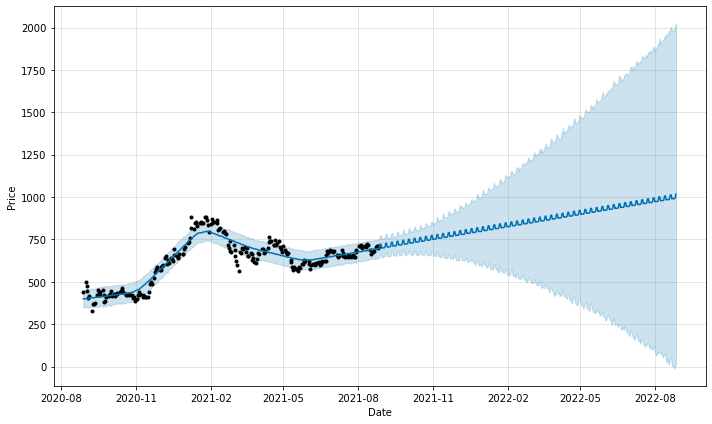

In [8]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")

In [7]:
%matplotlib inline